In [3]:
import numpy as np
import pickle   
import matplotlib.pyplot as plt
import scipy
import yaml
import tensorflow as tf

import os, sys
sys.path.append('../')

from src.eval.evaluate import Evaluator
from src.utils import ParseArgs, get_configs, load_data, init_model

from src.train.utils_train import gauss_kernel, fun_GSoperator_NN_conv_smooth_batch_adaptive



In [11]:
def fun_contourf_sol(z,RR,ZZ):
    plt.figure()
    plt.contourf(RR, ZZ, z, 20)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    return


def fun_contour_sol(z,RR,ZZ):
    plt.figure()
    plt.contour(RR, ZZ, z, 20)
    plt.axis('equal')
    plt.colorbar()
    plt.show()
    return

In [4]:
with open('../trained_models/PlaNet_10ksample_physics_informed/history.pkl', 'rb') as f:
    history_10k_PI = pickle.load(f)
with open('../trained_models/PlaNet_10ksample_no_physics_informed/history.pkl', 'rb') as f:
    history_10k_noPI = pickle.load(f)
with open('../trained_models/PlaNet_70ksample_physics_informed/history.pkl', 'rb') as f:
    history_70k_PI = pickle.load(f)
with open('../trained_models/PlaNet_70ksample_no_physics_informed/history.pkl', 'rb') as f:
    history_70k_noPI = pickle.load(f)

In [5]:
def running_mean(x, N):
    # cumsum = np.cumsum(np.insert(x, 0, 0)) 
    # return (cumsum[N:] - cumsum[:-N]) / float(N)
    return np.convolve(x, np.ones(N)/N, mode='same')

In [6]:
print(int(10000/64*2800), int(70000/64*400), int(70000/512*3500))

437500 437500 478515


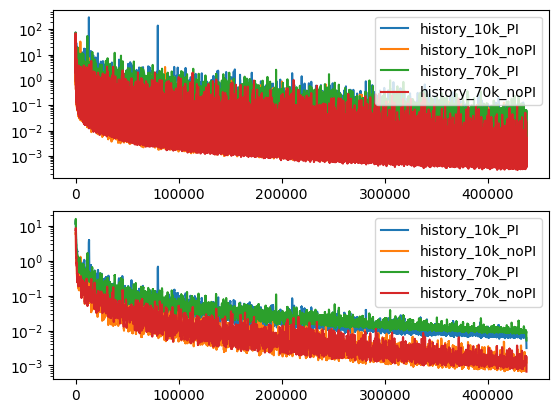

In [7]:

n_steps = int(10000/64*2800)

fig, ax = plt.subplots(2)
#
ax[0].plot(np.linspace(0, n_steps, len(history_10k_PI['loss_iter'])), history_10k_PI['loss_iter'], label='history_10k_PI')
ax[0].plot(np.linspace(0, n_steps, len(history_10k_noPI['loss_iter'])), history_10k_noPI['loss_iter'], label='history_10k_noPI')
ax[0].plot(np.linspace(0, n_steps, len(history_70k_PI['loss_iter'])), history_70k_PI['loss_iter'], label='history_70k_PI')
ax[0].plot(np.linspace(0, n_steps, len(history_70k_noPI['loss_iter'])), history_70k_noPI['loss_iter'], label='history_70k_noPI')
ax[0].set_yscale('log')
ax[0].legend()
#
ax[1].plot(np.linspace(0, n_steps, len(history_10k_PI['loss_iter'])), running_mean(history_10k_PI['loss_iter'],n_steps//1000), label='history_10k_PI')
ax[1].plot(np.linspace(0, n_steps, len(history_10k_noPI['loss_iter'])), running_mean(history_10k_noPI['loss_iter'],n_steps//1000), label='history_10k_noPI')
ax[1].plot(np.linspace(0, n_steps, len(history_70k_PI['loss_iter'])), running_mean(history_70k_PI['loss_iter'],n_steps//1000), label='history_70k_PI')
ax[1].plot(np.linspace(0, n_steps, len(history_70k_noPI['loss_iter'])), running_mean(history_70k_noPI['loss_iter'],n_steps//1000), label='history_70k_noPI')
ax[1].set_yscale('log')
ax[1].legend()

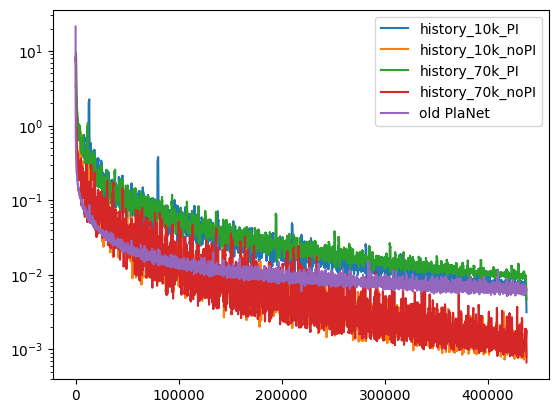

In [8]:
mat_history_kin_p = scipy.io.loadmat(r'../data/from_old_run/history_PlaNet_Equil_kin_65588sample')['history']
mat_history_kin_p_2 = scipy.io.loadmat(r'../data/from_old_run/history_PlaNet_Equil_kin_65588_2')['history']

mat_history_kin_p = np.column_stack((mat_history_kin_p,mat_history_kin_p_2[:,1:])).ravel()
running_mean_window = n_steps//500
fig, ax = plt.subplots(1)
#
ax.plot(np.linspace(0, n_steps, len(history_10k_PI['loss_iter'])), running_mean(history_10k_PI['loss_iter'],running_mean_window), label='history_10k_PI')
ax.plot(np.linspace(0, n_steps, len(history_10k_noPI['loss_iter'])), running_mean(history_10k_noPI['loss_iter'],running_mean_window), label='history_10k_noPI')
ax.plot(np.linspace(0, n_steps, len(history_70k_PI['loss_iter'])), running_mean(history_70k_PI['loss_iter'],running_mean_window), label='history_70k_PI')
ax.plot(np.linspace(0, n_steps, len(history_70k_noPI['loss_iter'])), running_mean(history_70k_noPI['loss_iter'],n_steps//1000), label='history_70k_noPI')
ax.plot(np.linspace(0, n_steps, mat_history_kin_p.shape[0]), mat_history_kin_p, label='old PlaNet')
ax.set_yscale('log')
ax.legend()


In [9]:

# import numpy as np
# import tensorflow as tf
# from tqdm import tqdm
# import scipy.io as io

# from tensorflow.keras.metrics import MeanSquaredError
# from src.train.utils_train import gauss_kernel, fun_GSoperator_NN_conv_smooth_batch_adaptive

# DTYPE = 'float32'


# def Mse2DImage(y_true,y_pred):
#     return tf.reduce_mean(tf.square(y_pred - y_true), axis=(-1,-2))

# def compute_GSO_kernels(RR_ds, ZZ_ds):

#     Laplace_kernel = np.zeros((RR_ds.shape[0],3,3),dtype=DTYPE)
#     Df_dr_kernel = np.zeros((RR_ds.shape[0],3,3),dtype=DTYPE)

#     for i in tqdm(range(ZZ_ds.shape[0])):
#         hr = RR_ds[i,1,2] - RR_ds[i,1,1]
#         hz = ZZ_ds[i,2,1] - ZZ_ds[i,1,1] 
#         alfa = -2*(hr**2 + hz**2)
#         Laplace_kernel_i = np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 1, hz**2/alfa], [0, hr**2/alfa, 0]))
#         Df_dr_kernel_i = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2)

#         Laplace_kernel[i,:,:] = Laplace_kernel_i
#         Df_dr_kernel[i,:,:] = Df_dr_kernel_i
#     return Laplace_kernel, Df_dr_kernel



# class Evaluator():
#     def __init__(self,model,config,test_ds):
#         self.model = model
#         self.config = config
#         self.test_ds = test_ds


#     def run(self):
#         # load grid
#         if 'mat' in self.config['data']['path']['grid']:
#             x_ds, y_ds, RHS_in_ds, _, _, _, _ = next(iter(self.test_ds))
#             geo = io.loadmat(self.config['data']['path']['grid'])
#             RR_ds,ZZ_ds = geo['RR_pixels'], geo['ZZ_pixels']
#             RR_ds = tf.tile(
#                 tf.expand_dims(RR_ds, axis=0), 
#                 (x_ds.shape[0],1,1))
#             ZZ_ds = tf.tile(
#                 tf.expand_dims(ZZ_ds, axis=0), 
#                 (x_ds.shape[0],1,1))
            
#         mse_flux = []
#         mse_GSope = []
#         for test_ds_i in tqdm(self.test_ds,mininterval=1):
#             x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, L_ker_ds, Df_ker_ds  = test_ds_i
#             # print(Df_ker_ds.shape)
#             # x_ds, y_ds, RHS_in_ds  = test_ds_i

#             # MSE on poloidal flux
#             pred = self.model([x_ds,RR_ds,ZZ_ds])
#             mse_flux.append(Mse2DImage(y_ds,pred[...,0]))



#             # L_ker_ds, Df_ker_ds = compute_GSO_kernels(RR_ds, ZZ_ds)

#             # hr = RR[1,2] - RR[1,1]
#             # hz = ZZ[2,1] - ZZ[1,1] 
#             # alfa = -2*(hr**2 + hz**2)
#             # Laplace_kernel = np.array(([0, hr**2/alfa, 0], [hz**2/alfa, 1, hz**2/alfa], [0, hr**2/alfa, 0]))
#             # Df_dr_kernel = np.array(([0, 0, 0], [+1, 0, -1], [0, 0, 0]))/(2*hr*alfa)*(hr**2*hz**2)

#             # MSE on GS operator
#             # print(pred.shape)
#             GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch_adaptive(
#                 pred,
#                 L_ker_ds,
#                 Df_ker_ds,
#                 gauss_kernel(self.config['train']['Gauss_filt_dim']),
#                 RR_ds,
#                 ZZ_ds)
#             mse_GSope.append(Mse2DImage(RHS_in_ds,GS_ope_ds))

#         self.mse_flux = np.array(mse_flux)
#         self.mse_GSope = np.array(mse_GSope)
            



def load_result(path):
    with open(path + 'configs.yaml', 'r') as f:
        config = yaml.safe_load(f)
    with open(path + '/history.pkl', 'rb') as f:
        history = pickle.load(f)
    
    for k,v in config['data']['path'].items():
        config['data']['path'][k] = '.' + v

    train_ds, test_ds = load_data(config)
    model = init_model(test_ds)

    model.load_weights(path + 'trained_model.keras', skip_mismatch=False)

    return config, history, model, train_ds, test_ds

paths = [
    '../trained_models/PlaNet_10ksample_no_physics_informed/',
    '../trained_models/PlaNet_10ksample_physics_informed/',
    '../trained_models/PlaNet_70ksample_physics_informed/',
    '../trained_models/PlaNet_70ksample_no_physics_informed/'
]
mse_flux = []
mse_GSope = []
for path in paths:
    config, history, model, train_ds, test_ds = load_result(path)

    evaluator = Evaluator(
        model=model,
        config=config,
        test_ds = test_ds
    )
    evaluator.run()
    mse_flux.append(evaluator.mse_flux)
    mse_GSope.append(evaluator.mse_GSope)
    

2024-04-18 18:21:37.271189: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-18 18:21:37.271212: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-18 18:21:37.271218: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-18 18:21:37.271549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 18:21:37.271825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
100%|██████████| 256/256 [00:09<00:00, 27.44it/s]


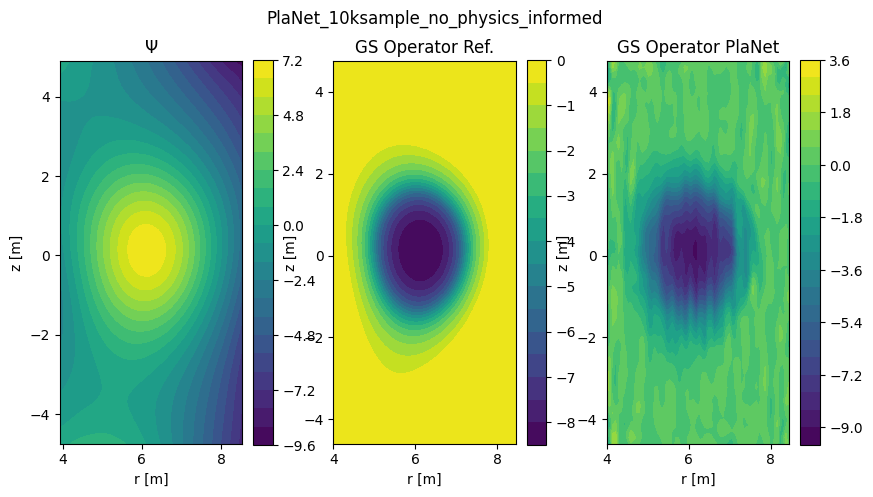

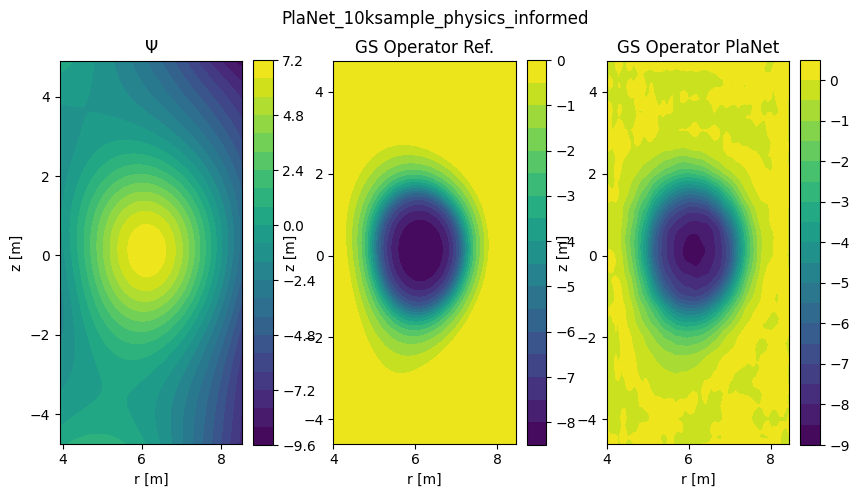

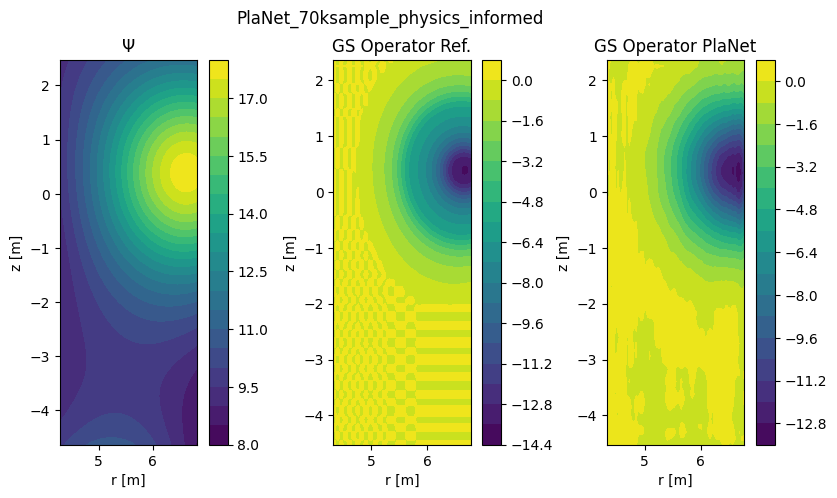

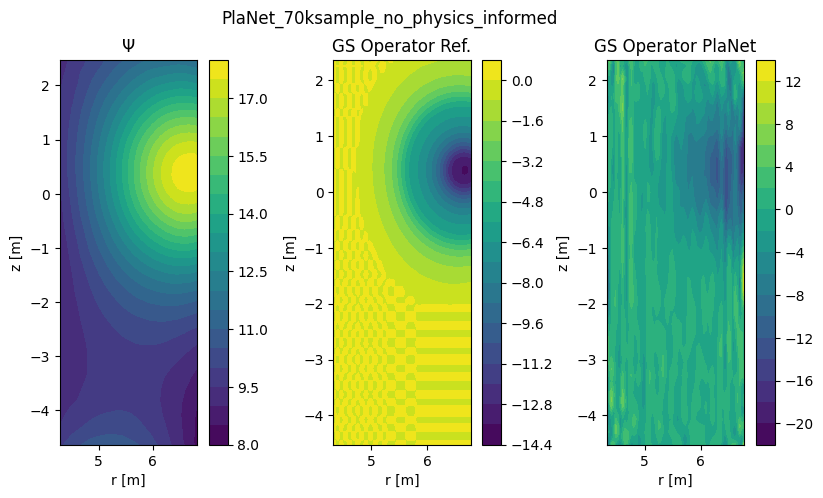

In [34]:
paths = [
    '../trained_models/PlaNet_10ksample_no_physics_informed/',
    '../trained_models/PlaNet_10ksample_physics_informed/',
    '../trained_models/PlaNet_70ksample_physics_informed/',
    '../trained_models/PlaNet_70ksample_no_physics_informed/'
]
for path in paths:
    config, history, model, train_ds, test_ds = load_result(path)
    x_ds, y_ds, RHS_in_ds, RR_ds, ZZ_ds, L_ker_ds, Df_ker_ds  = next(iter(train_ds))
    pred = model([x_ds,RR_ds,ZZ_ds])
    GS_ope_ds = fun_GSoperator_NN_conv_smooth_batch_adaptive(
        pred,
        L_ker_ds,
        Df_ker_ds,
        gauss_kernel(config['train']['Gauss_filt_dim']),
        RR_ds,
        ZZ_ds)
    
    fig,ax = plt.subplots(
        nrows=1,
        ncols=3,
        figsize = (10,5))
    im = ax[0].contourf(RR_ds[0,...],ZZ_ds[0,...], pred[0,...,0], 20)
    ax[0].set_aspect('equal', 'box')
    plt.colorbar(im,ax=ax[0])
    ax[0].set_title('$\Psi$')

    im = ax[1].contourf(RR_ds[0,1:-1,1:-1],ZZ_ds[0,1:-1,1:-1], RHS_in_ds[0,...], 20)
    ax[1].set_aspect('equal', 'box')
    plt.colorbar(im,ax=ax[1])
    ax[1].set_title('GS Operator Ref.')

    im = ax[2].contourf(RR_ds[0,1:-1,1:-1],ZZ_ds[0,1:-1,1:-1], GS_ope_ds[0,...], 20)
    ax[2].set_aspect('equal', 'box')
    plt.colorbar(im,ax=ax[2])
    ax[2].set_title('GS Operator PlaNet')

    for axi in ax:
        axi.set_xlabel('r [m]')
        axi.set_ylabel('z [m]')

    plt.suptitle(path.replace('../trained_models/','').replace('/',''))
    # plt.tight_layout()
    plt.show()
    

0.0013535223 0.0062273815
0.0013060503 0.004366393
0.0017564372 0.0016114315
0.0004235694 0.0005216701


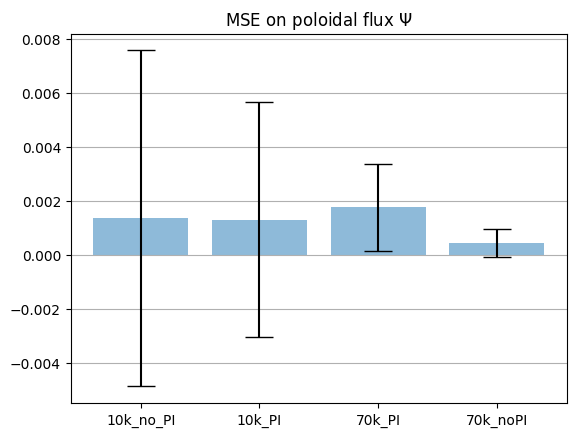

In [34]:
[print(x.mean(), x.std()) for x in mse_flux]
res = np.zeros((4,2))
for i,x in enumerate(mse_flux):
    res[i,...] = np.array([x.mean(), x.std()])

res_mean = [x.mean() for x in mse_flux]
res_std = [x.std() for x in mse_flux]

names = ['10k_no_PI', '10k_PI', '70k_PI', '70k_noPI']
x_pos = np.arange(len(names))


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, res_mean, yerr=res_std, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
ax.set_title('MSE on poloidal flux $\Psi$')
ax.yaxis.grid(True)

7.76759 12.981614
7.5350046 13.11139
7.5313196 13.113196
7.743659 12.9937315


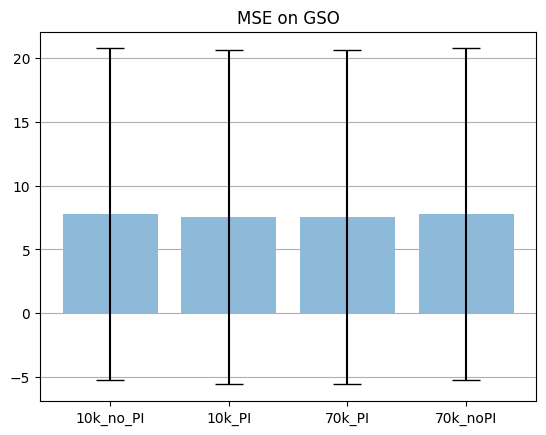

In [22]:
[print(x.mean(), x.std()) for x in mse_GSope]
res = np.zeros((4,2))
for i,x in enumerate(mse_flux):
    res[i,...] = np.array([x.mean(), x.std()])

res_mean = [x.mean() for x in mse_GSope]
res_std = [x.std() for x in mse_GSope]

names = ['10k_no_PI', '10k_PI', '70k_PI', '70k_noPI']
x_pos = np.arange(len(names))


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, res_mean, yerr=res_std, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
ax.set_title('MSE on GSO')
ax.yaxis.grid(True)